In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14

# Define a crosssection model

Select a crosssection model and pick a particle and target properties to limit the free parameters of the cross sections. 
Some parametrizations have more hyper parameters, for example the Photonuclear effect where a shadowing parametrization or the calculation of the hard component has to be defined. 
More information can be found by reading the class docstring:
```
? pp.parametrization.pairproduction.KelnerKokoulinPetrukhin
```
All crosssections, except the ionization one, are defined per component. 
Ionization requires a medium because several ionization constants are required.

In [2]:
param = pp.parametrization.bremsstrahlung.KelnerKokoulinPetrukhin(False)
args = {
    "particle_def": pp.particle.MuMinusDef(),
    "component": pp.component.Hydrogen(),
}

# Kinematic Limits

Every parametrization is restricted by its kinematic limits, $(v_{min}, v_{max})$, which are considered when the differential crosssection is integrated. 
The paramerter $v$ represents the relative energy the primary particle loses due to the interaction.

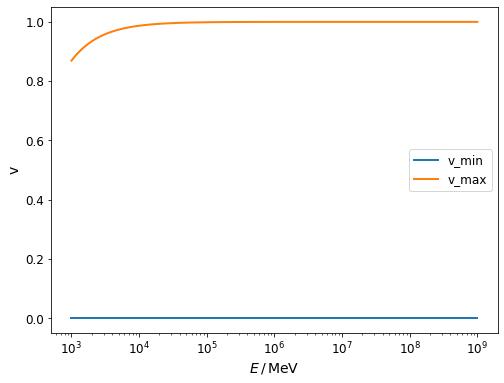

In [3]:
N_SUPPORT_POINTS = 100
energies = np.geomspace(1e3, 1e9, N_SUPPORT_POINTS)
v_mins, v_maxs = np.empty(N_SUPPORT_POINTS), np.empty(N_SUPPORT_POINTS)
for i, E in enumerate(energies):
    limits = param.kinematic_limits(**args, energy=E)
    v_mins[i], v_maxs[i] = (limits.v_min, limits.v_max)

plt.plot(energies,v_mins, label="v_min")
plt.plot(energies, v_maxs, label="v_max")
plt.legend()
plt.xlabel(r'$E \,/\, \mathrm{MeV} $')
plt.ylabel("v")
plt.xscale("log")

# Differential crosssection

Differential crosssections can be evaluated by specifying an energy $E$ and a fractional energy loss $v$.
The internal unit is grammage to take density profiles better into account. To get units of $1/cm$ one has to multiply the values by the local mass density.

The following plot shows a differential crosssection in a two-dimensional plot:

<ipython-input-4-19331480983b>:17: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(energyv,vv,diff_cross, locator=locator)


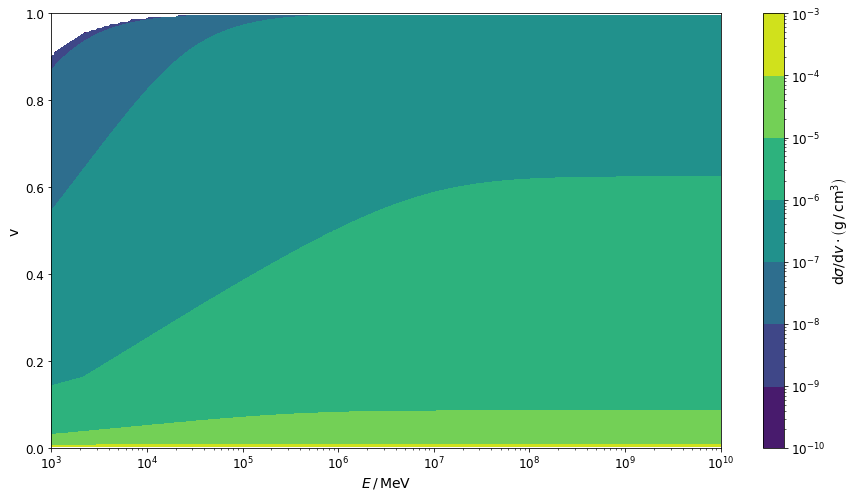

In [4]:
N_SUPPORT_POINTS_V, N_SUPPORT_POINTS_ENERGY  = 200, 200

vv, energyv = np.meshgrid(np.linspace(0,1,N_SUPPORT_POINTS_V), np.geomspace(1e3, 1e10, N_SUPPORT_POINTS_ENERGY))
diff_cross = np.empty(vv.shape)

for j in range(N_SUPPORT_POINTS_V):
    for i in range(N_SUPPORT_POINTS_ENERGY):
        diff_cross[i, j] = param.differential_crosssection(
            **args, energy=energyv[i, j], v=vv[i, j]
        )

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set_ylabel(r"v")
ax.set_xlabel(r'$E \,/\, \mathrm{MeV} $')
locator = ticker.LogLocator()
cs = ax.contourf(energyv,vv,diff_cross, locator=locator)
cbar = fig.colorbar(cs, label=r'$\mathrm{d}\sigma / \mathrm{d}v \cdot \left( \mathrm{g} \,/\, \mathrm{cm}^3 \right)$')
plt.xscale("log")